In [1]:
# General includes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import datetime
import seaborn as sns

%matplotlib inline

In [2]:
# My includes
k_blue ='#19647E'

sns.set_style("white")

# Some code to build a status bar
from IPython.display import clear_output

def updateStatusBar(progress):
    bar_length = 40
    progress = float(progress)
    if progress < 0:
        progress = 0
    if progress >= 1:
        progress = 1

    block = int(bar_length * progress)

    clear_output(wait = True)
    text = "Progress: [{0}] {1:.1f}%".format( "#" * block + "-" * (bar_length - block), progress * 100)
    print(text)

**LOAD DATA**

In [3]:
data_file = 'fbpac-ads-en-US.csv'
try:
  path = 'data/'
  df = pd.read_csv(path + data_file)
except:
  path = '/content/drive/My Drive/DS1 Final Project/data/'
  print('Loading data from Google Drive')
  df = pd.read_csv(path + data_file)
display(df.head(3))

,id,html,political,not_political,title,message,thumbnail,created_at,updated_at,lang,...,suppressed,targets,advertiser,entities,page,lower_page,targetings,paid_for_by,targetedness,listbuilding_fundraising_proba
0,hyperfeed_story_id_5c9baa3ee0ec08073500042,"<div class=""_5pa- userContentWrapper""><div cla...",0,0,League of Conservation Voters,<p>BREAKING: Trump’s Department of the Interio...,https://pp-facebook-ads.s3.amazonaws.com/v/t1....,2019-03-27 16:52:25.625455+00,2019-03-27 16:52:25.625455+00,en-US,...,f,[],NaN,"[{""entity"": ""Endangered Species Act"", ""entity_...",https://www.facebook.com/LCVoters/,https://www.facebook.com/lcvoters/,NaN,League of Conservation Voters,NaN,0.647945
1,hyperfeed_story_id_5c9bb2a2413852086735771,"<div class=""_5pa- userContentWrapper""><div cla...",0,0,Indivisible Guide,<p>The Mueller investigation is over. Special ...,https://pp-facebook-ads.s3.amazonaws.com/v/t1....,2019-03-27 17:28:14.096849+00,2019-03-27 17:28:14.096849+00,en-US,...,f,[],NaN,"[{""entity"": ""Americans"", ""entity_type"": ""Group...",https://www.facebook.com/indivisibleguide/,https://www.facebook.com/indivisibleguide/,NaN,Indivisible Project,NaN,0.350635
2,hyperfeed_story_id_5c9bb4fa461731e29426627,"<div class=""_5pa- userContentWrapper""><div cla...",0,0,International Rescue Committee,<p>Zimbabwe is reeling from the impact of Cycl...,https://pp-facebook-ads.s3.amazonaws.com/v/t1....,2019-03-27 17:38:23.101377+00,2019-03-27 17:38:23.101377+00,en-US,...,f,[],NaN,"[{""entity"": ""Zimbabwe"", ""entity_type"": ""Region""}]",https://www.facebook.com/InternationalRescueCo...,https://www.facebook.com/internationalrescueco...,NaN,International Rescue Committee,NaN,0.999909


In [4]:
desc_text = open(path + 'description', 'r', encoding="utf8").readlines()
desc = {}
for d in desc_text:
    key, value = d.split(':')
    print('{:24}{}'.format(key, value))
    desc[key] = {'desc': value,'example' : df[key][471]}
    
print('\n', desc['targets'])

id                       post id number on facebook

html                     HTML of the ad as collected by the Political Ad Collector

political                number of Political Ad Collector users who have voted that the ad is political

not_political            number of Political Ad Collector users who have voted that the ad is not political

title                    ad title

message                  ad content

thumbnail                link for a thumbnail of the profile image (of the advertiser)

created_at               date ad was first collected by the Political Ad Collector

updated_at               the most recent time that it got an impression OR the most recent time it was voted on

lang                     language of the ad. always en-US.

images                   link for images included in the ad

impressions              number of times the ad has been seen by the Political Ad Collector

political_probability    calculated by the classifier. data only includes ads 

# New Section

In [5]:
df.dtypes

id                                 object
html                               object
political                           int64
not_political                       int64
title                              object
message                            object
thumbnail                          object
created_at                         object
updated_at                         object
lang                               object
images                             object
impressions                         int64
political_probability             float64
targeting                          object
suppressed                         object
targets                            object
advertiser                         object
entities                           object
page                               object
lower_page                         object
targetings                         object
paid_for_by                        object
targetedness                      float64
listbuilding_fundraising_proba    

**SET DATE RANGE**

In [6]:
df['created_at'] = pd.to_datetime(df['created_at'])
df['updated_at'] = pd.to_datetime(df['updated_at'])

In [7]:
print('Date Range: {} to {}'.format(min(df['created_at']).date(), max(df['created_at']).date()))
midterm_date = datetime.date(2018, 11, 6)
print('2018 midterm date: {}'.format(midterm_date))

Date Range: 2017-07-31 to 2019-05-31
2018 midterm date: 2018-11-06


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1420: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Number of ads during period')

<Figure size 432x288 with 0 Axes>

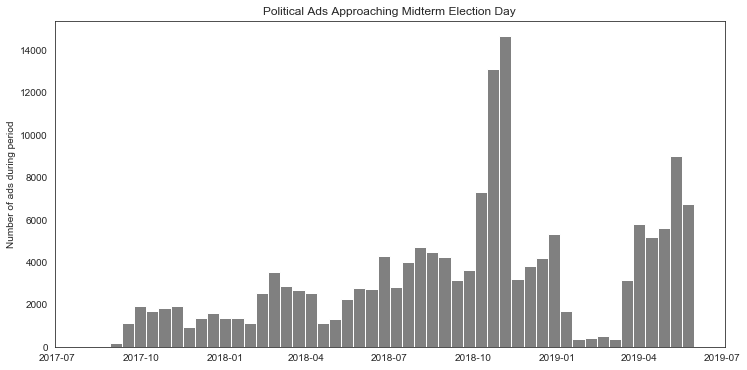

In [8]:
plt.clf();
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 6));

axes.set_title('Political Ads Approaching Midterm Election Day');
(n2, bins2, patches) = axes.hist(df['created_at'], bins = 50, color='gray');
axes.set_ylabel('Number of ads during period')

Could be nice to add the number of impressions over this time period...

In [9]:
df = df[(df['created_at'] <= '{}'.format(midterm_date))]
print('Setting Date Range: {} to {}'.format(min(df['created_at']).date(), max(df['created_at']).date()))

Setting Date Range: 2017-07-31 to 2018-11-05


**PARSE TARGETTING DATA**

In [10]:
print('DATAFRAME STATS')
df_length = len(df)
print('Number of ads collected: \t{}'.format(df_length))
df_targetted = df['targets'] != '[]'
print('Number of ads with targets: \t{}'.format(np.sum(df_targetted)))
print('Percent of ads with targets: \t{:.2%}'.format(np.sum(df_targetted)/df_length))

#plt.hist(df['political'] - df['not_political'], bins=20)
#plt.ylim((0,100))

DATAFRAME STATS
Number of ads collected: 	103129
Number of ads with targets: 	96964
Percent of ads with targets: 	94.02%


This is an example of a target list:

```
[{'target': 'Age', 'segment': '18 and older'}, {'target': 'MinAge', 'segment': '18'}, {'target': 'City', 'segment': 'New York'}, {'target': 'State', 'segment': 'New York'}, {'target': 'Activity on the Facebook Family'}]
```

OR

```
[{'target': 'Age', 'segment': '50 and older'}, {'target': 'MinAge', 'segment': '50'}, {'target': 'State', 'segment': 'Florida'}, {'target': 'City', 'segment': 'Fort Myers'}, {'target': 'Segment', 'segment': 'Multicultural affinity: Hispanic (US - All).'}]
```

Targets appear to be inclusive. Cities almost always have their state as an additional target. There are also some targets with multiple states, but the vast majority appear to have a single target. We should be sure to check the number of impressions for any category we are ommitting.

Some interesting segments, like `'segment': 'US politics (very liberal)'`. Other political segments are: `'liberal', 'moderate', 'conservative', and 'very conservative'`

There is also: `'target': 'Interest', 'segment': 'Republican Party (United States)'`

In [11]:
df['targetted'] = df_targetted
df['targetted'] = df['targetted'].fillna(False)
df['city_targetted'] = False

In [12]:
## Iterate through dataframe and build a list of unique target classifiers
target_list = {}  # Should be quicker to use a dictionary instead of list
region_list = {}
state_list = {}
city_list = {}
skipped_targets = 0

max_iter = np.inf # Set for testing
# Only iterate on targeted indices
for i, index in enumerate(df_targetted.index):
  if i > max_iter: break
  # Get target frame (this is a string in JSON format)
  targets = df['targets'][index]
  # Load target as JSON to list
  try:
    target = json.loads(targets)
  except:
    skipped_targets += 1
    continue
  #print([t['target'] for t in target])
  assert(all(len([t.keys]) <= 2 for t in target))
  # Iterate each target in list of form {'target': target, 'segment': segment}
  for t in target:
    # Add counter to target key (ex. 'Region')
    try: target_list[t['target']] += 1
    except KeyError: target_list[t['target']] = 1
    if (t['target'] == 'Region'): 
      try: region_list[t['segment']] += 1
      except KeyError: region_list[t['segment']] = 1
    elif (t['target'] == 'State'): 
      try: state_list[t['segment']] += 1
      except KeyError: state_list[t['segment']] = 1
    elif (t['target'] == 'City'): 
      df['city_targetted'][index] = True
      try: city_list[t['segment']] += 1
      except KeyError: city_list[t['segment']] = 1

print(skipped_targets)
assert skipped_targets/df_length < 0.05, "Skipped more than 1% of target frames"

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


4207


In [13]:
print('Target Keys and percentage of occurences in dataset')
print('Count | % Ads With Target | Target Name')
print('---------------------------------------------')
for i in np.argsort(list(target_list.values()))[::-1]:
  count = list(target_list.values())[i]
  print('{:<6}| ({:<6.2%})          | {}'.format(count, count/df_length, 
                                                  list(target_list.keys())[i]))

Target Keys and percentage of occurences in dataset
Count | % Ads With Target | Target Name
---------------------------------------------
92426 | (89.62%)          | Age
90230 | (87.49%)          | MinAge
75579 | (73.29%)          | Region
22644 | (21.96%)          | List
19516 | (18.92%)          | Retargeting
18880 | (18.31%)          | City
18826 | (18.25%)          | Interest
17585 | (17.05%)          | State
9727  | (9.43% )          | Segment
6510  | (6.31% )          | Like
5402  | (5.24% )          | MaxAge
4817  | (4.67% )          | Gender
4514  | (4.38% )          | Website
2759  | (2.68% )          | Activity on the Facebook Family
549   | (0.53% )          | Language
414   | (0.40% )          | Agency
23    | (0.02% )          | Engaged with Content


There are some international cities and regions we have to filter, but the list is dominated by US cities/state. We have around 20,000 data points with US city + state data. 

In [14]:
region_list

{'the United States': 52578,
 'Minnesota': 832,
 'Colorado': 831,
 'Florida': 1984,
 'North Dakota': 541,
 'California': 2059,
 'Ohio': 866,
 'Texas': 1871,
 'Pennsylvania': 500,
 'Massachusetts': 785,
 'New Hampshire': 90,
 'Arizona': 637,
 'Michigan': 963,
 'Oklahoma': 253,
 'Alaska': 284,
 'Georgia': 474,
 'Kansas': 168,
 'Iowa': 298,
 'Oregon': 476,
 'Montana': 517,
 'Nevada': 493,
 'New York': 929,
 'Missouri': 609,
 'Maine': 308,
 'Washington': 965,
 'Wisconsin': 599,
 'Idaho': 67,
 'District of Columbia': 308,
 'Tennessee': 363,
 'West Virginia': 180,
 'Louisiana': 51,
 'Puerto Rico': 9,
 'Illinois': 531,
 'New Jersey': 196,
 'Poland': 1,
 'Kentucky': 88,
 'Utah': 91,
 'South Carolina': 76,
 'Indonesia': 4,
 'North Carolina': 414,
 'Maryland': 282,
 'Virginia': 275,
 'Alberta': 21,
 'Connecticut': 218,
 'Canada': 142,
 'Indiana': 347,
 'Vermont': 26,
 'Belgium': 7,
 'New Mexico': 278,
 'Wyoming': 71,
 'Mississippi': 65,
 'Arkansas': 62,
 'Alabama': 84,
 'Nebraska': 91,
 'Delawar

In [15]:
len(city_list)

1655

There are 1500 unique cities, mostly in the US. On average, a city is targeted 10 times in the dataset. 

In [16]:
state_list

{'Minnesota': 679,
 'Washington': 867,
 'Florida': 1039,
 'California': 2166,
 'Colorado': 324,
 'District of Columbia': 529,
 'New York': 1313,
 'Montana': 148,
 'Georgia': 231,
 'Nevada': 196,
 'Connecticut': 197,
 'Virginia': 461,
 'New Jersey': 284,
 'Ohio': 468,
 'Michigan': 594,
 'West Virginia': 87,
 'Mississippi': 19,
 'South Carolina': 35,
 'Kansas': 210,
 'North Carolina': 502,
 'Illinois': 672,
 'Arizona': 435,
 'Maine': 132,
 'Texas': 1177,
 'Maryland': 514,
 'Oregon': 382,
 'Oklahoma': 145,
 'Massachusetts': 283,
 'Wisconsin': 382,
 'Missouri': 496,
 'North Dakota': 112,
 'Utah': 73,
 'Nebraska': 51,
 'Kentucky': 129,
 'Arkansas': 43,
 'Hillsborough County, Florida': 111,
 'Alabama': 114,
 'Pennsylvania': 573,
 'Alaska': 147,
 'Tennessee': 139,
 'Idaho': 50,
 'Indiana': 213,
 'Louisiana': 53,
 'New Mexico': 203,
 'Iowa': 246,
 'South Dakota': 15,
 'British Columbia': 1,
 'Ontario': 118,
 'Vermont': 28,
 'Delaware': 14,
 'Hawaii': 43,
 'Alberta': 10,
 'Wyoming': 14,
 'Butle

In [17]:
df.dtypes

id                                             object
html                                           object
political                                       int64
not_political                                   int64
title                                          object
message                                        object
thumbnail                                      object
created_at                        datetime64[ns, UTC]
updated_at                        datetime64[ns, UTC]
lang                                           object
images                                         object
impressions                                     int64
political_probability                         float64
targeting                                      object
suppressed                                     object
targets                                        object
advertiser                                     object
entities                                       object
page                        

Average impressions for non-targetted ad: 1.3
Average impressions for targetted ad: 6.7
Average impressions for ad targetted at city: 6.9


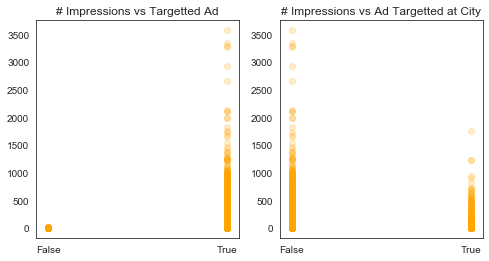

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4));
avg_targetted = np.mean(df[df['targetted'] == True]['impressions'])
avg_not_targetted = np.mean(df[df['targetted'] == False]['impressions'])
print("Average impressions for non-targetted ad: {:.2}".format(avg_not_targetted))
print("Average impressions for targetted ad: {:.2}".format(avg_targetted))
avg_city_targetted = np.mean(df[df['city_targetted'] == False]['impressions'])
print("Average impressions for ad targetted at city: {:.2}".format(avg_city_targetted))

axes[0].scatter(df['targetted'], df['impressions'], alpha=0.2, color='orange');
axes[0].set_xticks([0,1]);
axes[0].set_xticklabels(["False", "True"]);
axes[0].set_title('# Impressions vs Targetted Ad');
axes[1].scatter(df['city_targetted'], df['impressions'], alpha=0.2, color='orange');
axes[1].set_xticks([0,1]);
axes[1].set_xticklabels(["False", "True"]);
axes[1].set_title('# Impressions vs Ad Targetted at City');

In [22]:
import geopandas as gpd
from shapely.geometry import Point, Polygon

*The* number of impressions goes up dramatically if the ad is targetted. Although the range for impressions goes down in ads targetted to a city, the average number of impressions actually increases.

In [23]:
usa = gpd.read_file(path + '../maps/states.shp')

In [24]:
usa.head(3)

,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
0,Hawaii,1,15,Pacific,HI,"MULTIPOLYGON (((-160.07380 22.00418, -160.0497..."
1,Washington,2,53,Pacific,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628..."
2,Montana,3,30,Mountain,MT,"POLYGON ((-111.47543 44.70216, -111.48080 44.6..."


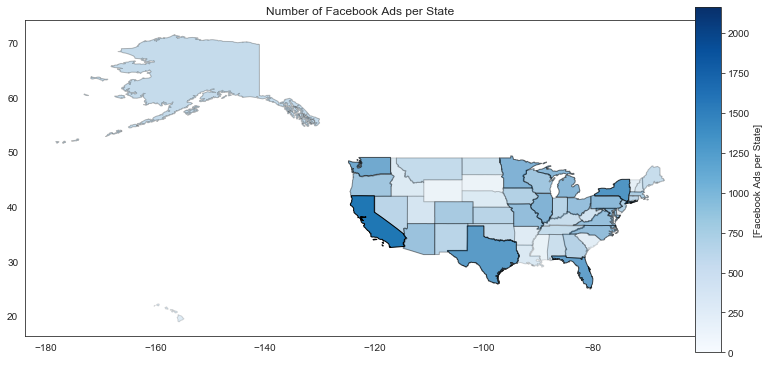

In [52]:
from matplotlib.colors import rgb2hex, Normalize
from matplotlib.colorbar import ColorbarBase

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 6));
axes.set_title('Number of Facebook Ads per State')
# plot background
cmap = plt.cm.Blues
max_counts = max(list(state_list.values()))

for state in usa['STATE_NAME']:
  try:
    color_val = np.sqrt(state_list[state]/max_counts)
  except KeyError:
    print('{} not in target states')
    color_val = 0
  usa[usa['STATE_NAME'] == state].plot(ax = axes, edgecolor='black', 
                                        alpha=color_val)
ax_c = fig.add_axes([0.9, 0.1, 0.03, 0.8])
cb = ColorbarBase(ax_c,cmap=cmap,norm=Normalize(vmin=0, vmax=max_counts),
                  orientation='vertical',
                  label=r'[Facebook Ads per State]')
plt.show();

In [27]:
population = {
"Alabama": 4887871,
"Alaska": 737438,
"Arizona": 7171646,
"Arkansas": 3013825,
"California": 39557045,
"Colorado": 5695564,
"Connecticut": 3572665,
"Delaware": 967171,
"District of Columbia": 702455,
"Florida": 21299325,
"Georgia": 10519475,
"Hawaii": 1420491,
"Idaho": 1754208,
"Illinois": 12741080,
"Indiana": 6691878,
"Iowa": 3156145,
"Kansas": 2911505,
"Kentucky": 4468402,
"Louisiana": 4659978,
"Maine": 1338404,
"Maryland": 6042718,
"Massachusetts": 6902149,
"Michigan": 9995915,
"Minnesota": 5611179,
"Mississippi": 2986530,
"Missouri": 6126452,
"Montana": 1062305,
"Nebraska": 1929268,
"Nevada": 3034392,
"New Hampshire": 1356458,
"New Jersey": 8908520,
"New Mexico": 2095428,
"New York": 19542209,
"North Carolina": 10383620,
"North Dakota": 760077,
"Ohio": 11689442,
"Oklahoma": 3943079,
"Oregon": 4190713,
"Pennsylvania": 12807060,
"Rhode Island": 1057315,
"South Carolina": 5084127,
"South Dakota": 882235,
"Tennessee": 6770010,
"Texas": 28701845,
"Utah": 3161105,
"Vermont": 626299,
"Virginia": 8517685,
"Washington": 7535591,
"West Virginia": 1805832,
"Wisconsin": 5813568,
"Wyoming": 577737}

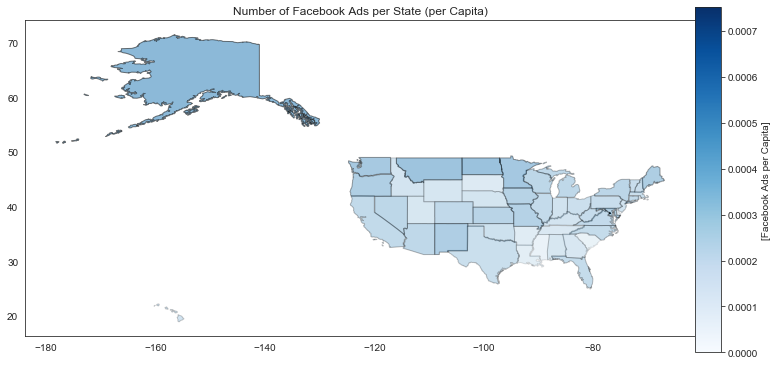

In [54]:
ads_per_capita = {}

for state in usa['STATE_NAME']:
  ads_per_capita[state] = state_list[state]/population[state]

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 6));
axes.set_title('Number of Facebook Ads per State (per Capita)')
# plot background
cmap = plt.cm.Blues
max_ads_per_capita = max(list(ads_per_capita.values()))

for state in usa['STATE_NAME']:
  try:
    color_val = np.sqrt(ads_per_capita[state]/max_ads_per_capita)
  except KeyError:
    print('{} not in target states'.format(state))
    color_val = 0
  usa[usa['STATE_NAME'] == state].plot(ax = axes, edgecolor='black', 
                                       alpha=color_val)
ax_c = fig.add_axes([0.9, 0.1, 0.03, 0.8])
cb = ColorbarBase(ax_c,cmap=cmap,norm=Normalize(vmin=0, vmax=max_ads_per_capita),
                  orientation='vertical',
                  label=r'[Facebook Ads per Capita]')
plt.show();

We don't really get the full dynamic range of the color scale because Ditrict of Columbia has so many ads per capita. However, we do see that the typical swing states (Colorado, Florida, Iowa, Michigan, Minnesota, Ohio, Nevada, New Hampshire, North Carolina, Pennsylvania, Virginia, and Wisconsin) generally have higher ads per capita. 

In [55]:
swing_states = ["Colorado", "Florida", "Iowa", "Michigan", "Minnesota", "Ohio", "Nevada", "New Hampshire", "North Carolina", "Pennsylvania", "Virginia", "Wisconsin"]

In [56]:
print("Average Ads per capita: {}".format(np.mean(list(ads_per_capita.values()))))
print("Ads per capita in swing state: {}".format(
    np.mean([ads_per_capita[state] for state in swing_states])))

Average Ads per capita: 6.822255893806249e-05
Ads per capita in swing state: 6.054663011404162e-05


In [ ]:
# read in House Election Data, pull party of winner in each state/district
# Manually create CSV of "State Name", "Party of Winner"